**Homework 5**

Ada Huang

CSCE633-600

April 26,2023

# Problem 1: Regularizaed Logistic Regression

## Show that $w_k = w_l$ for the optimal solution $w$ if two attributes $k$ and $l$ are identical.

$\textit{proof： }$ To show that $w_k = w_l$ for the optimal solution $w$ if two attributes $k$ and $l$ are identical, i.e., $x_{i,k} = x_{i,l}$ for any training example $x_i$, we can take the partial derivative of the regularized logistic regression negative log-likelihood function $L(w)$ with respect to both $w_k$ and $w_l$. If the partial derivatives are equal, then $w_k = w_l$.

\begin{align}
\frac{\partial L(w)}{\partial w_k} &= -C\sum_{i=1}^n \frac{y_i x_{i,k} \exp(-y_i x_i^T w)}{1 + \exp(-y_i x_i^T w)} + w_k, \\
\frac{\partial L(w)}{\partial w_l} &= -C\sum_{i=1}^n \frac{y_i x_{i,l} \exp(-y_i x_i^T w)}{1 + \exp(-y_i x_i^T w)} + w_l.
\end{align}

Since $x_{i,k} = x_{i,l}$, we can replace $x_{i,l}$ with $x_{i,k}$ in (2): 

$$
\frac{\partial L(w)}{\partial w_l} = -C\sum_{i=1}^n \frac{y_i x_{i,k} \exp(-y_i x_i^T w)}{1 + \exp(-y_i x_i^T w)} + w_l.
$$

Comparing the two equations, we find that:

$$
\frac{\partial L(w)}{\partial w_k} = \frac{\partial L(w)}{\partial w_l}
$$

Since both partial derivatives are equal, the optimal solution for $w$ must have equal values for $w_k$ and $w_l$. Therefore, $w_k = w_l$ when $x_{i,k} = x_{i,l}$ for all training examples. $\square$

In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_indices(file_path):
    with open(file_path, 'r') as file:
        indices = [int(line.strip()) - 1 for line in file.readlines()]
    return indices

In [4]:
C_candidates = {'C': [0.1, 1, 10, 100, 1000]}

In [5]:
breast_test_errors = {}

In [6]:
sonar_test_errors = {}

## Train the test the regularized logistic regression model on two datasets. 

In [7]:
logreg = LogisticRegression(penalty='l2', solver='liblinear')

### breast

In [8]:
X_breast, y_breast = load_svmlight_file("hw5_data\\breast-cancer_scale.txt")

In [9]:
X_breast.shape

(683, 10)

In [10]:
breast_train_indices = load_indices("hw5_data\\breast-cancer-scale-train-indices.txt")
breast_test_indices = load_indices("hw5_data\\breast-cancer-scale-test-indices.txt")

In [11]:
X_train_breast, y_train_breast = X_breast[breast_train_indices], y_breast[breast_train_indices]
X_test_breast, y_test_breast = X_breast[breast_test_indices], y_breast[breast_test_indices]

In [12]:
grid_search = GridSearchCV(logreg, C_candidates, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_breast, y_train_breast)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='accuracy')

In [13]:
print("C     | Training Error | Validation Error")
print("-------------------------------------------")
for mean_train, mean_val, params in zip(grid_search.cv_results_['mean_train_score'],
                                        grid_search.cv_results_['mean_test_score'],
                                        grid_search.cv_results_['params']):
    print(f"{params['C']:5} | {1 - mean_train:13.4f} | {1 - mean_val:15.4f}")

C     | Training Error | Validation Error
-------------------------------------------
  0.1 |        0.0395 |          0.0440
    1 |        0.0220 |          0.0400
   10 |        0.0225 |          0.0300
  100 |        0.0220 |          0.0320
 1000 |        0.0220 |          0.0300


In [14]:
best_C = grid_search.best_params_['C']
best_model = LogisticRegression(solver='liblinear', C=best_C, penalty='l2')
best_model.fit(X_train_breast, y_train_breast)
y_pred_breast = best_model.predict(X_test_breast)

In [15]:
accuracy = accuracy_score(y_test_breast, y_pred_breast)
print(f"\nBest C: {best_C}")
print(f"Accuracy: {accuracy:.2f}")


Best C: 10
Accuracy: 0.96


In [16]:
breast_test_errors['Logistic regression'] = 1 - accuracy

### sonar

In [17]:
X_sonar, y_sonar = load_svmlight_file("hw5_data\\sonar_scale.txt")

In [18]:
X_sonar.shape

(208, 60)

In [19]:
sonar_train_indices = load_indices("hw5_data\\sonar-scale-train-indices.txt")
sonar_test_indices = load_indices("hw5_data\\sonar-scale-test-indices.txt")

In [20]:
X_train_sonar, y_train_sonar = X_sonar[sonar_train_indices], y_sonar[sonar_train_indices]
X_test_sonar, y_test_sonar = X_sonar[sonar_test_indices], y_sonar[sonar_test_indices]

In [21]:
grid_search = GridSearchCV(logreg, C_candidates, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_sonar, y_train_sonar)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='accuracy')

In [22]:
print("C     | Training Error | Validation Error")
print("-------------------------------------------")
for mean_train, mean_val, params in zip(grid_search.cv_results_['mean_train_score'],
                                        grid_search.cv_results_['mean_test_score'],
                                        grid_search.cv_results_['params']):
    print(f"{params['C']:5} | {1 - mean_train:13.4f} | {1 - mean_val:15.4f}")

C     | Training Error | Validation Error
-------------------------------------------
  0.1 |        0.1367 |          0.4000
    1 |        0.0583 |          0.3933
   10 |        0.0167 |          0.3800
  100 |        0.0000 |          0.3933
 1000 |        0.0000 |          0.3867


In [23]:
best_C = grid_search.best_params_['C']
best_model = LogisticRegression(solver='liblinear', C=best_C, penalty='l2')
best_model.fit(X_train_sonar, y_train_sonar)
y_pred_sonar = best_model.predict(X_test_sonar)

In [24]:
accuracy = accuracy_score(y_test_sonar, y_pred_sonar)
print(f"\nBest C: {best_C}")
print(f"Accuracy: {accuracy:.2f}")


Best C: 10
Accuracy: 0.78


In [25]:
sonar_test_errors['Logistic regression'] = 1 - accuracy

# Problem 2: Support Vecotr Machine

### linear SVM

In [26]:
linear_svc = LinearSVC(loss='hinge', penalty='l2', dual=True)

#### breast

In [27]:
grid_search = GridSearchCV(linear_svc, C_candidates, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_breast, y_train_breast)

GridSearchCV(cv=5, estimator=LinearSVC(loss='hinge'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='accuracy')

In [28]:
print("C     | Training Error | Validation Error")
print("-------------------------------------------")
for mean_train, mean_val, params in zip(grid_search.cv_results_['mean_train_score'],
                                        grid_search.cv_results_['mean_test_score'],
                                        grid_search.cv_results_['params']):
    print(f"{params['C']:5} | {1 - mean_train:13.4f} | {1 - mean_val:15.4f}")

C     | Training Error | Validation Error
-------------------------------------------
  0.1 |        0.0255 |          0.0360
    1 |        0.0210 |          0.0280
   10 |        0.0205 |          0.0280
  100 |        0.0205 |          0.0360
 1000 |        0.0720 |          0.1140


In [29]:
best_C = grid_search.best_params_['C']
best_model = LinearSVC(loss='hinge', C=best_C, penalty='l2',dual=True)
best_model.fit(X_train_breast, y_train_breast)
y_pred_breast = best_model.predict(X_test_breast)

In [30]:
accuracy = accuracy_score(y_test_breast, y_pred_breast)
print(f"\nBest C: {best_C}")
print(f"Accuracy: {accuracy:.2f}")


Best C: 1
Accuracy: 0.97


In [31]:
breast_test_errors['Linear SVM'] = 1 - accuracy

#### sonar

In [32]:
grid_search = GridSearchCV(linear_svc, C_candidates, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_sonar, y_train_sonar)

GridSearchCV(cv=5, estimator=LinearSVC(loss='hinge'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='accuracy')

In [33]:
print("C     | Training Error | Validation Error")
print("-------------------------------------------")
for mean_train, mean_val, params in zip(grid_search.cv_results_['mean_train_score'],
                                        grid_search.cv_results_['mean_test_score'],
                                        grid_search.cv_results_['params']):
    print(f"{params['C']:5} | {1 - mean_train:13.4f} | {1 - mean_val:15.4f}")

C     | Training Error | Validation Error
-------------------------------------------
  0.1 |        0.1233 |          0.4133
    1 |        0.0517 |          0.3867
   10 |        0.0117 |          0.4000
  100 |        0.0000 |          0.3867
 1000 |        0.0000 |          0.3867


In [34]:
best_C = grid_search.best_params_['C']
best_model = LinearSVC(loss='hinge', C=best_C, penalty='l2',dual=True)
best_model.fit(X_train_sonar, y_train_sonar)
y_pred_sonar = best_model.predict(X_test_sonar)

In [35]:
accuracy = accuracy_score(y_test_sonar, y_pred_sonar)
print(f"\nBest C: {best_C}")
print(f"Accuracy: {accuracy:.2f}")


Best C: 1
Accuracy: 0.72


In [36]:
sonar_test_errors['Linear SVM'] = 1 - accuracy

### kernel SVM

In [37]:
kernels = ['poly', 'rbf']

#### breast

In [38]:
for kernel in kernels:
    print(f"Kernel: {kernel}")
    
    svm = SVC(kernel=kernel)

    grid_search = GridSearchCV(svm, C_candidates, cv=5, scoring='accuracy', return_train_score=True)

    grid_search.fit(X_train_breast, y_train_breast)

    print("C     | Training Error | Validation Error")
    print("-------------------------------------------")
    for mean_train, mean_val, params in zip(grid_search.cv_results_['mean_train_score'],
                                            grid_search.cv_results_['mean_test_score'],
                                            grid_search.cv_results_['params']):
        print(f"{params['C']:5} | {1 - mean_train:13.4f} | {1 - mean_val:15.4f}")

    best_C = grid_search.best_params_['C']
    best_model = SVC(kernel=kernel, C=best_C)
    best_model.fit(X_train_breast, y_train_breast)

    y_pred_breast = best_model.predict(X_test_breast)

    accuracy = accuracy_score(y_test_breast, y_pred_breast)

    breast_test_errors[f'Kernel SVM ({kernel})'] = 1 - accuracy

    print(f"\nBest C: {best_C}")
    print(f"Accuracy: {accuracy:.2f}\n")

Kernel: poly
C     | Training Error | Validation Error
-------------------------------------------
  0.1 |        0.0220 |          0.0240
    1 |        0.0130 |          0.0280
   10 |        0.0020 |          0.0480
  100 |        0.0000 |          0.0560
 1000 |        0.0000 |          0.0560

Best C: 0.1
Accuracy: 0.97

Kernel: rbf
C     | Training Error | Validation Error
-------------------------------------------
  0.1 |        0.0275 |          0.0300
    1 |        0.0190 |          0.0300
   10 |        0.0050 |          0.0380
  100 |        0.0000 |          0.0460
 1000 |        0.0000 |          0.0460

Best C: 0.1
Accuracy: 0.96



#### sonar

In [39]:
for kernel in kernels:
    print(f"Kernel: {kernel}")
    
    svm = SVC(kernel=kernel)

    grid_search = GridSearchCV(svm, C_candidates, cv=5, scoring='accuracy', return_train_score=True)

    grid_search.fit(X_train_sonar, y_train_sonar)

    print("C     | Training Error | Validation Error")
    print("-------------------------------------------")
    for mean_train, mean_val, params in zip(grid_search.cv_results_['mean_train_score'],
                                            grid_search.cv_results_['mean_test_score'],
                                            grid_search.cv_results_['params']):
        print(f"{params['C']:5} | {1 - mean_train:13.4f} | {1 - mean_val:15.4f}")

    best_C = grid_search.best_params_['C']
    best_model = SVC(kernel=kernel, C=best_C)
    best_model.fit(X_train_sonar, y_train_sonar)

    y_pred_sonar = best_model.predict(X_test_sonar)

    accuracy = accuracy_score(y_test_sonar, y_pred_sonar)

    sonar_test_errors[f'Kernel SVM ({kernel})'] = 1 - accuracy
    print(f"\nBest C: {best_C}")
    print(f"Accuracy: {accuracy:.2f}\n")

Kernel: poly
C     | Training Error | Validation Error
-------------------------------------------
  0.1 |        0.2150 |          0.3400
    1 |        0.0133 |          0.3333
   10 |        0.0000 |          0.3400
  100 |        0.0000 |          0.3400
 1000 |        0.0000 |          0.3400

Best C: 1
Accuracy: 0.88

Kernel: rbf
C     | Training Error | Validation Error
-------------------------------------------
  0.1 |        0.4217 |          0.4400
    1 |        0.0417 |          0.4133
   10 |        0.0000 |          0.3800
  100 |        0.0000 |          0.3800
 1000 |        0.0000 |          0.3800

Best C: 10
Accuracy: 0.93



### compare test error given by Logistic regression, linear SVM and kernel svm

#### breast

In [40]:
print("Breast Cancer Dataset")
print("Method               | Test Error")
print("---------------------------------")
for method, error in breast_test_errors.items():
    print(f"{method:20} | {error:.4f}")

Breast Cancer Dataset
Method               | Test Error
---------------------------------
Logistic regression  | 0.0383
Linear SVM           | 0.0328
Kernel SVM (poly)    | 0.0328
Kernel SVM (rbf)     | 0.0383


The Polynomial Kernel SVM and linear SVM are the best performing methods among the four, with the lowest test errors. Logistic Regression and RBF Kernel SVM all perform equally, with a higher test error compared to the Polynomial Kernel SVM and linear SVM.

#### sonar

In [41]:
print("Sonar Dataset")
print("Method               | Test Error")
print("---------------------------------")
for method, error in sonar_test_errors.items():
    print(f"{method:20} | {error:.4f}")

Sonar Dataset
Method               | Test Error
---------------------------------
Logistic regression  | 0.2241
Linear SVM           | 0.2759
Kernel SVM (poly)    | 0.1207
Kernel SVM (rbf)     | 0.0690


The RBF Kernel SVM is the best performing method among the four for the Sonar Dataset, with the lowest test error. Polynomial Kernel SVM comes in second place, followed by Logistic Regression and Linear SVM.

# Problem 3

In [42]:
linear_svc = LinearSVC(loss='hinge', penalty='l2', dual=True)

In [43]:
with open(os.path.join('hw5_data', 'covtype.data')) as f:
    data = np.loadtxt(f, delimiter=',', dtype=int)

In [44]:
X = data[:, :-1]
y = (data[:, -1] == 2).astype(int)

In [45]:
X.shape, y.shape

((581012, 54), (581012,))

In [46]:
train_indices = load_indices("hw5_data\\covtype.train.index.txt")
test_indices = load_indices("hw5_data\\covtype.test.index.txt")


In [47]:
X_train, y_train = data[train_indices, :-1], data[train_indices, -1]
X_test, y_test = data[test_indices, :-1], data[test_indices, -1]

In [60]:
y_train_binary = np.where(y_train == 2, 1, 0)
y_test_binary = np.where(y_test == 2, 1, 0)

In [61]:
# train_sample_size = int(0.1 * len(X_train))
# test_sample_size = int(0.1 * len(X_test))

# train_sample_indices = np.random.choice(len(X_train), size=train_sample_size, replace=False)
# test_sample_indices = np.random.choice(len(X_test), size=test_sample_size, replace=False)

# X_train_small = X_train[train_sample_indices]
# y_train_small = y_train_binary[train_sample_indices]

# X_test_small = X_test[test_sample_indices]
# y_test_small = y_test_binary[test_sample_indices]

In [49]:
def preprocess_data(X, method='raw'): # if not specified, use raw data
    if method == 'rescaling':
        scaler = preprocessing.MinMaxScaler()
    elif method == 'standardization':
        scaler = preprocessing.StandardScaler()
    elif method == 'normalization':
        scaler = preprocessing.Normalizer()
    else:
        raise ValueError('Invalid preprocessing method')
    
    X_transformed = scaler.fit_transform(X)
    return X_transformed

In [56]:
def train_svm(X_train, y_train,verbose=0):
    svm = LinearSVC(loss='hinge', penalty='l2', dual=True, random_state=42)
    param_grid = {'C': [0.1, 1, 10, 100, 1000]}
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc', verbose=verbose, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_C = grid_search.best_params_['C']
    best_model = LinearSVC(loss='hinge', C=best_C, penalty='l2', dual=True)
    best_model.fit(X_train, y_train)
    
    return best_model

In [51]:
def evaluate_svm(svm, X_test, y_test):
    y_pred = svm.predict(X_test)
    y_score = svm.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    
    return accuracy, f1, auc_score, fpr, tpr

In [63]:
# method = 'rescaling'
# X_train_transformed = X_train_small
# X_test_transformed = X_test_small

# svm = train_svm(X_train_transformed, y_train_small,verbose=3)
# accuracy, f1, auc_score, fpr, tpr = evaluate_svm(svm, X_test_transformed, y_test_small)

# print(f"Method: {method}")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"F1-score: {f1:.4f}")
# print(f"AUC: {auc_score:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Method: rescaling
Accuracy: 0.5098
F1-score: 0.0063
AUC: 0.5709


In [64]:
methods = ['raw', 'rescaling', 'standardization', 'normalization']
results = []

for method in tqdm(methods, desc="Processing methods"):
    if method == 'raw':
        X_train_transformed = X_train
        X_test_transformed = X_test
    else:
        X_train_transformed = preprocess_data(X_train, method)
        X_test_transformed = preprocess_data(X_test, method)
    
    svm = train_svm(X_train_transformed, y_train_binary, verbose=3)
    accuracy, f1, auc_score, fpr, tpr = evaluate_svm(svm, X_test_transformed, y_test_binary)
    results.append((accuracy, f1, auc_score, fpr, tpr))

Processing methods:   0%|          | 0/4 [00:00<?, ?it/s]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Processing methods:  25%|██▌       | 1/4 [13:14<39:42, 794.04s/it]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Processing methods:  50%|█████     | 2/4 [17:10<15:31, 465.90s/it]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Processing methods:  75%|███████▌  | 3/4 [36:36<13:05, 785.86s/it]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Processing methods: 100%|██████████| 4/4 [44:09<00:00, 662.37s/it]


In [65]:
results_df = pd.DataFrame(results, columns=['Accuracy', 'F1-score', 'AUC', 'FPR', 'TPR'], index=methods)
print(results_df[['Accuracy', 'F1-score', 'AUC']])

                 Accuracy  F1-score       AUC
raw              0.563209  0.683992  0.755081
rescaling        0.764565  0.758163  0.823703
standardization  0.764789  0.764282  0.823786
normalization    0.508373  0.662484  0.765352


`raw`: without any preprocessing, the raw data has the lowest accuracy and F1-score compared to the other methods. This indicates that the model is not performing well on the raw dataset, possibly due to the different scales and distributions of the features.

`rescaling`: this method brings the features into the same range, which helps the model perform better compared to the raw data. The accuracy, F1-score, and AUC are significantly improved, showing that the model benefits from feature scaling.

`standardazation`: this method centers the features around the mean with unit variance. In this case, the performance is almost identical to rescaling, with a slightly higher F1-score. It suggests that the linear SVM model is not significantly affected by the difference between rescaling and standardization for this dataset.

`normalization`: this method scales the features to have unit norms. In this case, the performance is worse than rescaling and standardization, with lower accuracy, F1-score, and AUC. It could be that normalization is not suitable for this dataset due to the nature of the features.

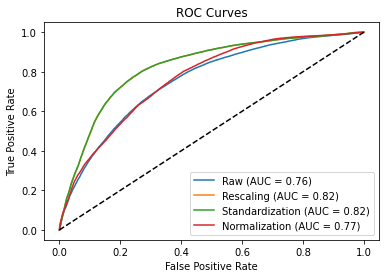

In [66]:
plt.figure()
for method, result in zip(methods, results):
    fpr, tpr, auc_score = result[3], result[4], result[2]
    plt.plot(fpr, tpr, label=f"{method.capitalize()} (AUC = {auc_score:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

All three methods performs better than the identical line, which means they are better than random guessing. We can see from the ROC curves that the rescaling and standardization both perform similarly, with a slight advantage for standardization. The raw data and normalization both perform poorly, with a low AUC. The rescaling and standardization methods are the best performing methods for this dataset, with the highest accuracy, F1-score, and AUC.

# Problem 4 Dual Form and Kernel Trick

Consider the optimization problem:
\begin{equation*}
\min_{w \in \mathbb{R}^d} \frac{\lambda}{2} \|w\|^2_2 + \frac{1}{n} \sum_{i=1}^n |y_i - w^T x_i|
\end{equation*}

Use a dual variable $\alpha_i$, we have
\begin{equation*}
\min_{w \in \mathbb{R}^d} \max_{\alpha \in [-1, 1]^n} \frac{\lambda}{2} \|w\|^2_2 + \frac{1}{n} \sum_{i=1}^n \alpha_i (y_i - w^T x_i)
\end{equation*}

Change the order of $\min$ and $\max$:
\begin{equation*}
\max_{\alpha \in [-1, 1]^n} \min_{w \in \mathbb{R}^d} \frac{\lambda}{2} \|w\|^2_2 + \frac{1}{n} \sum_{i=1}^n \alpha_i (y_i - w^T x_i)
\end{equation*}

Now we find the optimal $w$ by taking the gradient of the objective function with respect to $w$ and setting it to zero:
\begin{equation*}
\nabla_w \left( \frac{\lambda}{2} \|w\|^2_2 + \frac{1}{n} \sum_{i=1}^n \alpha_i (y_i - w^T x_i) \right) = \lambda w - \frac{1}{n} \sum_{i=1}^n \alpha_i x_i = 0
\end{equation*}

And we have the optimal $w$
\begin{equation*}
w^* = \frac{1}{\lambda n} \sum_{i=1}^n \alpha_i x_i
\end{equation*}

Plug $w^*$ back to the objective function:
\begin{align*}
&\max_{\alpha \in [-1, 1]^n} \frac{\lambda}{2} \left\|\frac{1}{\lambda n} \sum_{i=1}^n \alpha_i x_i\right\|^2_2 + \frac{1}{n} \sum_{i=1}^n \alpha_i \left(y_i - \frac{1}{\lambda n} \sum_{j=1}^n \alpha_j x_j^T x_i\right) \\
&= \max_{\alpha \in [-1, 1]^n} \frac{1}{2n^2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j x_i^T x_j + \frac{1}{n} \sum_{i=1}^n \alpha_i y_i - \frac{1}{n^2 \lambda} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j x_i^T x_j
\end{align*}

To derive the kernelized least absolute deviation, we can replace the dot product $x_i^T x_j$ with a kernel function $K(x_i, x_j)$:

\begin{align*}
&= \max_{\alpha \in [-1, 1]^n} \frac{1}{2n^2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j K(x_i, x_j) + \frac{1}{n} \sum_{i=1}^n \alpha_i y_i - \frac{1}{n^2 \lambda} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j K(x_i, x_j) \
&= \max_{\alpha \in [-1, 1]^n} \left(\frac{1}{n} \sum_{i=1}^n \alpha_i y_i - \frac{1}{2n^2 \lambda} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j K(x_i, x_j) \right)
\end{align*}